# MNIST with sklearn

The goal of this exercise is to 
* explore some of the sklearn functionality for training a MLP classifier (see https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)  
* by using cross validation 
* learn how to compute the confusion matrix and its derived quantities and how to interpret them
* explore the test error as a function of the complexity (number of units, number of layers)
* explore the impact of L2 regularisation

__IMPORTANT REMARK__: We here follow the convention of sklearn to enumerate the samples with the first index. 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## Load and prepare the data 

In [2]:
datadir = '../../exercise3/data/'

In [3]:
def normalize(x_train,x_test):
    """
    Normalizes the pixels values of the images - mean and stdev are computed from the training set.
    
    Parameters:
    x_train -- Array of training samples of shape (n,m1) where n,m1 are the number of features and samples, respectively.  
    x_test -- Array of test samples of shape (n,m2) where n,m2 are the number of features and samples, respectively. 
    
    Returns:
    The arrays with the normalized train and test samples.  
    """
    mean = np.mean(x_train)
    std = np.std(x_train)
    x_train -= mean
    x_test -= mean
    x_train /= std
    x_test /= std
    return x_train, x_test

In [4]:
# in case you have trouble with the fetch_openml, use this code
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
x,y = fetch_openml('mnist_784', data_home=datadir, return_X_y=True)
x_train0, x_test0, y_train, y_test = train_test_split(x, y, test_size=10000, random_state=1)
x_train, x_test = normalize(x_train0, x_test0)

## Specify Model Family and learn how to compute the metrics

#### Model
Use the functionality of scikit learn to configure a MLP and its training procedure with
* hidden layers: 0-2 layers with suitable number of units per layer
* mini-batch gradient descent with given batch_size (no advanced optimisers)
* constant learning rate (no learning rate schedules)
* number of epochs
* no regularisation such as L2 penalty or early stopping

#### Metrics
Compute the train and test error resp. accuracy as well as the class precision, recall, f1-score.

__See__:
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

## First Training Run

Run the training and plot the training loss with a first set of values:
* no hidden layers
* mini-batchsize: 64
* learning rate: 0.1
* 100 epochs

Compute the Metrics.
Which digits are hard to predict?  

#### MODEL

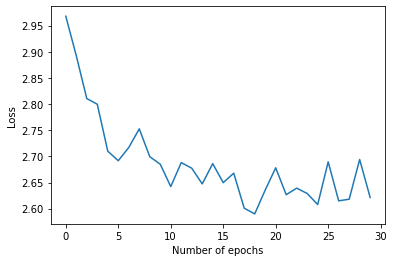

In [14]:
from sklearn.neural_network import MLPClassifier

# Basic Hyperparameters
hidden_layer_sizes = ()
batch_size = 64
learning_rate = 0.1
nepochs = 100

# Regularisation:
alpha = 0.0 # L2 regularisation constant
early_stopping = False
n_iter_no_change = 10

### START YOUR CODE ###
# Model instantiation and training

clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    alpha=alpha,
                    batch_size=batch_size,
                    learning_rate='constant',
                    learning_rate_init=learning_rate,
                    max_iter=nepochs,
                    early_stopping=early_stopping,
                    n_iter_no_change=n_iter_no_change)
clf.fit(x_train, y_train)
clf.predict_proba(x_test)

# Plot loss curve

plt.plot(clf.loss_curve_)
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.show()

### END YOUR CODE ###

#### METRICS

In [43]:
### START YOUR CODE ###

# train and test error, accuracy
# per class accuracy, precision, f1 score










### END YOUR CODE ###

Train Acc:  0.9271
Test Acc:  0.9085
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       946
           1       0.97      0.96      0.97      1195
           2       0.91      0.91      0.91      1031
           3       0.92      0.82      0.87      1162
           4       0.94      0.86      0.90      1019
           5       0.84      0.88      0.86       886
           6       0.93      0.96      0.94       917
           7       0.93      0.92      0.92      1067
           8       0.83      0.91      0.87       850
           9       0.85      0.91      0.88       927

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Best Model without Hidden Layer

By first varying just the parameters 
* mini-batchsize
* learning rate
* epochs

with adding any hidden layer.

Summarize what the best combination of the abover hyper-parameters is.

In [ ]:
### START YOUR CODE ###

# Keep hidden_layer_sizes = () 
# Vary the following

batch_size = 64
learning_rate = 0.1
nepochs = 100

### END YOUR CODE ###

__BEST MODEL__ (no hidden layer)

batch_size = 

learning_rate = 

nepochs = 

train / validation error :

## Adding one Hidden layer

Explore the performance of the model by varying the parameters 
* mini-batchsize
* learning rate
* epochs
* complexity (number of units in the one hidden layer)

For given complexity, summarize what the best combination of other hyper-parameters is - compute this for several complexities.

Compute also the "best" train and validation error (or accuracy) for given complexity - as a function of the complexity and plot the curve (for selected number of units - e.g. 10 different values). 


In [ ]:
### START YOUR CODE ###

# Keep hidden_layer_sizes = () 
# Vary the following

hidden_layer_sizes = (100,) # just one layer 
batch_size = 64
learning_rate = 0.1
nepochs = 100

### END YOUR CODE ###

__Error vs Complexity__:

Plot with the train and test error vs complexity (number of units in the hidden layer)

In [1]:
### START YOUR CODE ###





### END YOUR CODE ###

__BEST MODEL__ (one hidden layer)

hidden_layer_sizes = (*,)

batch_size = 

learning_rate = 

nepochs = 

train / validation error :


## Impact of Regularisation

Explore the Impact of Using L2 Regularisation (still adding just one hidden layer) again by varying mini-batchsize, learning rate, epochs, complexity.

Can you reach a better best model performance (on validation set)?

In [3]:
### START YOUR CODE ###

# Vary the following

# Basic Hyperparameters
hidden_layer_sizes = (100,)
batch_size = 64
learning_rate = 0.1
nepochs = 100

# Regularisation:
alpha = 0.0 # L2 regularisation constant

### END YOUR CODE ###

__Error vs Complexity__:

Plot with the train and test error vs complexity (number of units in the hidden layer)

In [2]:
### START YOUR CODE ###





### END YOUR CODE ###

__BEST MODEL__ (one hidden layer)

hidden_layer_sizes = (*,)

batch_size = 

learning_rate = 

nepochs = 

alpha =  # L2 regularisation constant

train / validation error :

## Adding up to 3 Hidden Layers

Now consider using a model with more than one hidden layer (at max 3).


In [3]:
### START YOUR CODE ###

# Vary the following

# Basic Hyperparameters
hidden_layer_sizes = (100,0,0)
batch_size = 64
learning_rate = 0.1
nepochs = 100

# Regularisation:
alpha = 0.0 # L2 regularisation constant

### END YOUR CODE ###

__Error vs Complexity__:

Plot with the train and test error vs complexity (number of units in the hidden layer)

In [2]:
### START YOUR CODE ###





### END YOUR CODE ###

__BEST MODEL__ (1-3 hidden layers)

hidden_layer_sizes = (*,*,*)

batch_size = 

learning_rate = 

nepochs = 

alpha =  # L2 regularisation constant

train / validation error :

## Test Performance of Best Model

Test Error: 